# Carga, limpieza y análisis de los datos sobre los edificios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dbfread import DBF
import geopandas as gpd
import datetime
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
building = gpd.read_file('Data_input/Edificios/A.ES.SDGC.BU.28900.building.gml', driver='GML')
building.head()

,gml_id,lowerCorner,upperCorner,beginLifespanVersion,conditionOfConstruction,beginning,end,endLifespanVersion,informationSystem,reference,...,numberOfBuildingUnits,numberOfDwellings,numberOfFloorsAboveGround,documentLink,format,sourceStatus,officialAreaReference,value,value_uom,geometry
0,ES.SDGC.BU. VK4700H,None,None,2022-05-10T00:00:00,-,--01-01T00:00:00,--01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,VK4700H,...,0,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,0,m2,"MULTIPOLYGON (((439573.035 4471080.490, 439572..."
1,ES.SDGC.BU.RA610010000000,None,None,2016-11-16T00:00:00,functional,1959-01-01T00:00:00,1991-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,RA610010000000,...,1,1,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,105,m2,"POLYGON ((446347.720 4481239.072, 446346.880 4..."
2,ES.SDGC.BU.00006Z8VK4800A,None,None,2017-05-11T00:00:00,-,--01-01T00:00:00,--01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,00006Z8VK4800A,...,0,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,0,m2,"POLYGON ((440020.830 4479859.707, 440020.064 4..."
3,ES.SDGC.BU.000200100VK48E,None,None,2004-05-19T00:00:00,functional,1968-01-01T00:00:00,1968-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,000200100VK48E,...,1,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,26,m2,"POLYGON ((441657.574 4487050.292, 441658.164 4..."
4,ES.SDGC.BU.000200500VK56E,None,None,2013-10-17T00:00:00,declined,1995-01-01T00:00:00,1995-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,000200500VK56E,...,1,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,646,m2,"MULTIPOLYGON (((451584.920 4467181.410, 451586..."


In [3]:
building.loc[0]

gml_id                                                                  ES.SDGC.BU.  VK4700H
lowerCorner                                                                             None
upperCorner                                                                             None
beginLifespanVersion                                                     2022-05-10T00:00:00
conditionOfConstruction                                                                    -
beginning                                                                   --01-01T00:00:00
end                                                                         --01-01T00:00:00
endLifespanVersion                                                                      None
informationSystem                          https://www1.sedecatastro.gob.es/CYCBienInmueb...
reference                                                                            VK4700H
localId                                                               

In [4]:
buildingpart = gpd.read_file('Data_input/Edificios/A.ES.SDGC.BU.28900.buildingpart.gml', driver='GML')
buildingpart.head()

,gml_id,beginLifespanVersion,conditionOfConstruction,localId,namespace,horizontalGeometryEstimatedAccuracy,horizontalGeometryEstimatedAccuracy_uom,horizontalGeometryReference,referenceGeometry,numberOfFloorsAboveGround,heightBelowGround,heightBelowGround_uom,numberOfFloorsBelowGround,geometry
0,ES.SDGC.BU. VK4700H_part1,2021-09-24T00:00:00,None,VK4700H_part1,ES.SDGC.BU,0.1,m,footPrint,True,3,0,m,0,"POLYGON ((439922.132 4470807.196, 439928.661 4..."
1,ES.SDGC.BU. VK4700H_part2,2021-09-24T00:00:00,None,VK4700H_part2,ES.SDGC.BU,0.1,m,footPrint,True,3,0,m,0,"POLYGON ((439847.183 4470837.528, 439847.133 4..."
2,ES.SDGC.BU. VK4700H_part3,2021-11-10T00:00:00,None,VK4700H_part3,ES.SDGC.BU,0.1,m,footPrint,True,5,0,m,0,"POLYGON ((439672.149 4470773.173, 439674.231 4..."
3,ES.SDGC.BU. VK4700H_part4,2021-11-10T00:00:00,None,VK4700H_part4,ES.SDGC.BU,0.1,m,footPrint,True,4,0,m,0,"POLYGON ((439672.149 4470773.173, 439672.671 4..."
4,ES.SDGC.BU. VK4700H_part5,2022-04-21T00:00:00,None,VK4700H_part5,ES.SDGC.BU,0.1,m,footPrint,True,4,0,m,0,"POLYGON ((440401.943 4470887.490, 440402.173 4..."


In [5]:
print("Registros en building:", len(building))
print("Registros en buildingpart:", len(buildingpart))

Registros en building: 124995
Registros en buildingpart: 852337


La Dirección General del Catastro estima una altura de 3 metros para cada planta bajo rasante. Por eso, para este conjunto de datos, como solo importa el número de plantas sobre rasante, también se estima una altura de 3 metros para cada una.

In [6]:
buildingpart['HEIGHT'] = buildingpart['numberOfFloorsAboveGround']*3
buildingpart.head()

,gml_id,beginLifespanVersion,conditionOfConstruction,localId,namespace,horizontalGeometryEstimatedAccuracy,horizontalGeometryEstimatedAccuracy_uom,horizontalGeometryReference,referenceGeometry,numberOfFloorsAboveGround,heightBelowGround,heightBelowGround_uom,numberOfFloorsBelowGround,geometry,HEIGHT
0,ES.SDGC.BU. VK4700H_part1,2021-09-24T00:00:00,None,VK4700H_part1,ES.SDGC.BU,0.1,m,footPrint,True,3,0,m,0,"POLYGON ((439922.132 4470807.196, 439928.661 4...",9
1,ES.SDGC.BU. VK4700H_part2,2021-09-24T00:00:00,None,VK4700H_part2,ES.SDGC.BU,0.1,m,footPrint,True,3,0,m,0,"POLYGON ((439847.183 4470837.528, 439847.133 4...",9
2,ES.SDGC.BU. VK4700H_part3,2021-11-10T00:00:00,None,VK4700H_part3,ES.SDGC.BU,0.1,m,footPrint,True,5,0,m,0,"POLYGON ((439672.149 4470773.173, 439674.231 4...",15
3,ES.SDGC.BU. VK4700H_part4,2021-11-10T00:00:00,None,VK4700H_part4,ES.SDGC.BU,0.1,m,footPrint,True,4,0,m,0,"POLYGON ((439672.149 4470773.173, 439672.671 4...",12
4,ES.SDGC.BU. VK4700H_part5,2022-04-21T00:00:00,None,VK4700H_part5,ES.SDGC.BU,0.1,m,footPrint,True,4,0,m,0,"POLYGON ((440401.943 4470887.490, 440402.173 4...",12


In [23]:
buildingpart_2 = buildingpart[["gml_id", "geometry", "HEIGHT"]]
buildingpart_2.head()

,gml_id,geometry,HEIGHT
0,ES.SDGC.BU. VK4700H_part1,"POLYGON ((439922.132 4470807.196, 439928.661 4...",9
1,ES.SDGC.BU. VK4700H_part2,"POLYGON ((439847.183 4470837.528, 439847.133 4...",9
2,ES.SDGC.BU. VK4700H_part3,"POLYGON ((439672.149 4470773.173, 439674.231 4...",15
3,ES.SDGC.BU. VK4700H_part4,"POLYGON ((439672.149 4470773.173, 439672.671 4...",12
4,ES.SDGC.BU. VK4700H_part5,"POLYGON ((440401.943 4470887.490, 440402.173 4...",12


In [ ]:
#dataset_buildingpart_shp = buildingpart_2.to_file('Data/Edificios/buildingpart.shp', index=False)

In [21]:
termino_municipal = gpd.read_file('Data_input/Termino municipal/termino_municipal.gml', driver='GML')
termino_municipal.head()

,gml_id,OBJECTID,Shape_Leng,Shape_Area,TM,geometry
0,termino_municipal.0,1,174177.932753,6.044551e+08,Madrid,"MULTIPOLYGON (((445503.158 4498783.075, 445674..."


In [6]:
buildingpart_2['HEIGHT'].nunique()

55

In [8]:
buildingpart_2['HEIGHT'].value_counts()

HEIGHT
3      173410
6      122602
12      94846
15      92173
9       89502
18      67902
0       60470
21      50671
24      37393
27      23679
30      13437
33       7740
36       4996
39       4466
42       3121
45       2077
48       1154
51        668
54        422
57        310
72        216
69        196
60        160
75        119
66        115
63         92
78         58
105        45
99         45
96         38
102        33
84         30
108        25
93         23
87         23
81         17
90         15
111        10
135         6
159         5
171         3
168         3
132         3
165         3
174         3
150         2
120         2
177         1
126         1
156         1
153         1
129         1
147         1
138         1
123         1
Name: count, dtype: int64

In [12]:
buildingpart_2.describe()

,HEIGHT
count,852337.000000
mean,11.583270
std,9.367789
min,0.000000
25%,3.000000
50%,9.000000
75%,18.000000
max,177.000000


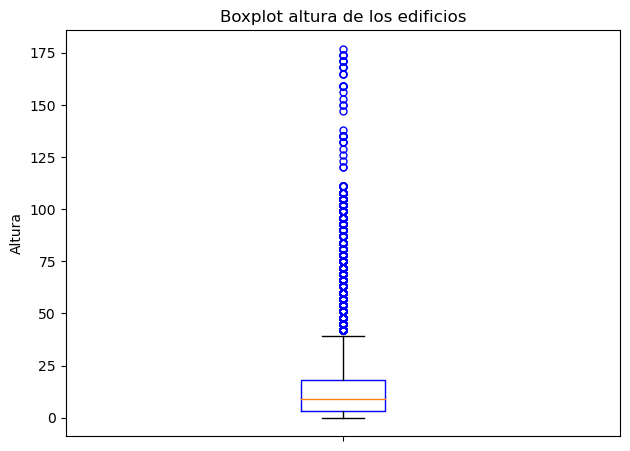

In [45]:
plt.boxplot(buildingpart['HEIGHT'], flierprops={'markersize': 5, 'markeredgecolor':'blue'},
            boxprops={'color':'blue'})
#flierprops={'markersize': 3, 'markeredgecolor':'#1f77b4'},
#                  boxprops={'color':'#1f77b4'}, 
#                  medianprops={'color':'#1f77b4'},
#                  whiskerprops={'color':'#1f77b4'},)
plt.title('Boxplot altura de los edificios')
plt.ylabel('Altura')
plt.tight_layout()
plt.xticks([1], [''])
#plt.savefig('Capturas/boxplot_altura.png', bbox_inches='tight')
plt.show()

## Crear nuevo dataset building

In [7]:
print("Referencias únicas en building:", building['reference'].nunique())
print("Referencias únicas en buildingpart:", buildingpart['localId'].nunique())

Referencias únicas en building: 124995
Referencias únicas en buildingpart: 852337


Se obtiene el string con la referencia del edificio al que pertenece la construcción:

In [18]:
# todos
buildingpart['references'] = buildingpart['localId'].str.split('_').str[0]

In [19]:
buildingpart['references'].nunique()

124067

Se obtiene el año de construcción del edificio a partir del campo "beginning":

In [26]:
building['yearConstruction'] = building['beginning'].str.split('-').str[0]

In [27]:
building.columns

Index(['gml_id', 'lowerCorner', 'upperCorner', 'beginLifespanVersion',
       'conditionOfConstruction', 'beginning', 'end', 'endLifespanVersion',
       'informationSystem', 'reference', 'localId', 'namespace',
       'horizontalGeometryEstimatedAccuracy',
       'horizontalGeometryEstimatedAccuracy_uom',
       'horizontalGeometryReference', 'referenceGeometry', 'currentUse',
       'numberOfBuildingUnits', 'numberOfDwellings',
       'numberOfFloorsAboveGround', 'documentLink', 'format', 'sourceStatus',
       'officialAreaReference', 'value', 'value_uom', 'geometry',
       'yearConstruction'],
      dtype='object')

Se seleccionan las variables necesarias:

In [198]:
building2 = building[['gml_id','yearConstruction','localId','currentUse',
                      'numberOfBuildingUnits','numberOfDwellings','value','geometry']]
building2.rename(columns={'value':'area'}, inplace=True)

In [199]:
building2.loc[0]

gml_id                                                ES.SDGC.BU.  VK4700H
yearConstruction                                                          
localId                                                            VK4700H
currentUse                                                            None
numberOfBuildingUnits                                                    0
numberOfDwellings                                                        0
area                                                                     0
geometry                 MULTIPOLYGON (((439573.03495 4471080.4898, 439...
Name: 0, dtype: object

Se obtiene el número máximo de plantas que contiene el edificio:

In [200]:
ref_grouped = buildingpart.groupby('references', as_index=False)['numberOfFloorsAboveGround'].max()
ref_grouped.rename(columns={'numberOfFloorsAboveGround':'numMaxOfFloorsAboveGround'}, inplace=True)
ref_grouped.head()

,references,numMaxOfFloorsAboveGround
0,000200100VK48E,1
1,000200500VK56E,1
2,000205600VK56E,1
3,000205700VK56E,1
4,000205800VK56E,1


In [201]:
building3 = pd.merge(building2, ref_grouped, how='left', left_on='localId', right_on='references')
building3.drop('references', axis=1, inplace=True)
building3.head()

,gml_id,yearConstruction,localId,currentUse,numberOfBuildingUnits,numberOfDwellings,area,geometry,numMaxOfFloorsAboveGround
0,ES.SDGC.BU. VK4700H,,VK4700H,None,0,0,0,"MULTIPOLYGON (((439573.035 4471080.490, 439572...",6.0
1,ES.SDGC.BU.RA610010000000,1959,RA610010000000,1_residential,1,1,105,"POLYGON ((446347.720 4481239.072, 446346.880 4...",1.0
2,ES.SDGC.BU.00006Z8VK4800A,,00006Z8VK4800A,None,0,0,0,"POLYGON ((440020.830 4479859.707, 440020.064 4...",NaN
3,ES.SDGC.BU.000200100VK48E,1968,000200100VK48E,2_agriculture,1,0,26,"POLYGON ((441657.574 4487050.292, 441658.164 4...",1.0
4,ES.SDGC.BU.000200500VK56E,1995,000200500VK56E,3_industrial,1,0,646,"MULTIPOLYGON (((451584.920 4467181.410, 451586...",1.0


In [202]:
building3['numMaxOfFloorsAboveGround'].isnull().sum()

1694

In [203]:
building3['numMaxOfFloorsAboveGround'].fillna(value=0, inplace=True)
building3['numMaxOfFloorsAboveGround'] = building3['numMaxOfFloorsAboveGround'].astype(int)
building3.head()

,gml_id,yearConstruction,localId,currentUse,numberOfBuildingUnits,numberOfDwellings,area,geometry,numMaxOfFloorsAboveGround
0,ES.SDGC.BU. VK4700H,,VK4700H,None,0,0,0,"MULTIPOLYGON (((439573.035 4471080.490, 439572...",6
1,ES.SDGC.BU.RA610010000000,1959,RA610010000000,1_residential,1,1,105,"POLYGON ((446347.720 4481239.072, 446346.880 4...",1
2,ES.SDGC.BU.00006Z8VK4800A,,00006Z8VK4800A,None,0,0,0,"POLYGON ((440020.830 4479859.707, 440020.064 4...",0
3,ES.SDGC.BU.000200100VK48E,1968,000200100VK48E,2_agriculture,1,0,26,"POLYGON ((441657.574 4487050.292, 441658.164 4...",1
4,ES.SDGC.BU.000200500VK56E,1995,000200500VK56E,3_industrial,1,0,646,"MULTIPOLYGON (((451584.920 4467181.410, 451586...",1


In [204]:
#building_new_dataset2 = building3.to_file('Datasets buildings/Building_clean2.shp', index=False)